## Task 4.10

### This script contains the following direction¶

#### 1. Data Security
#### 2. Create a regional column from the state data
#### 3. Creating list of High and Low customers activity
#### 4. Adding the income column to the dataframe
#### 5. Marketing Strategy: Customers profiling;
#### 6. Create visualization
#### 7. Aggregating the  customers profile level for frequency and expenditure
#### 8. Compare your customer profiles with regions and departments

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

In [2]:
path=r"C:\Users\acisk\Dropbox\My PC (DESKTOP-SO8P63N)\Desktop\Data Analytics\Achievement 4- Python Fundamentals for Data Analysts\Instacart Basket Analysis 14-08-2021"

In [3]:
# Importing customers and products data
customers_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Combined_customers_order.pkl'))

In [4]:
customers_products.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customers_frequecy,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,_merge
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,both


#### 1. Data Security

In [5]:
# Dropping PII datas
new_customers_products= customers_products.drop(['First Name', 'Surname'], axis=1)

#### This data contains PII, i.e information in the dataframe can be traced back to a particular person which is first and last name, since i am not given instruction on how to treat this data, i chosed to drop the PII columns

In [6]:
new_customers_products.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spenders_type,order_frequency_flag,customers_frequecy,Gender,STATE,Age,date_joined,n_dependants,fam_status,_merge
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both


#### 2. Create a regional column from the state data

In [7]:
#Creating a regional column from state
regions = []

for state in new_customers_products['STATE']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        regions.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        regions.append('Northeast')
    elif (state == 'Delaware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        regions.append('South')
    else:
        regions.append('West')

In [8]:
new_customers_products['Region']=  regions

In [9]:
# check if the change is effected
new_customers_products.value_counts('Region')

Region
South        668445
West         512332
Midwest      466881
Northeast    352342
dtype: int64

In [10]:
new_customers_products.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,customers_frequecy,Gender,STATE,Age,date_joined,n_dependants,fam_status,_merge,Region
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South


In [11]:
# Determine whether there is difference in spending hadbit of each region
crosstab_region_spenders_type = pd.crosstab(new_customers_products['Region'], new_customers_products['spenders_type'], dropna = False)

In [12]:
crosstab_region_spenders_type

spenders_type,High spender,Low spender
Region,,
Midwest,6493,460388
Northeast,4467,347875
South,9657,658788
West,6425,505907


In [13]:
# Copy to clipboard
crosstab_region_spenders_type.to_clipboard()

#### 3. Creating list of High and Low customers activity

In [14]:
# view all column names
new_customers_products.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'Average_price', 'spenders_type', 'order_frequency_flag',
       'customers_frequecy', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', '_merge', 'Region'],
      dtype='object')

In [15]:
# create low activity customer flag
new_customers_products.loc[new_customers_products['max_order'] < 5, 'customers_activity'] = 'Low'

In [16]:
# create high activity customer flag
new_customers_products.loc[new_customers_products['max_order'] > 5, 'customers_activity'] = 'High'

In [17]:
# check if the change is effected
new_customers_products.value_counts('customers_activity')

customers_activity
High    1880299
Low       76897
dtype: int64

In [18]:
# Exclude low activity customer from list
new_customer_list = new_customers_products[new_customers_products['max_order'] > 5]

In [19]:
new_customer_list.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customers_frequecy,Gender,STATE,Age,date_joined,n_dependants,fam_status,_merge,Region,customers_activity
0,2539329,1,1,2,8,11.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South,High
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South,High
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South,High
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South,High
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,both,South,High


#### 4. Adding the income column to the dataframe

In [20]:
# Importing customer data so as to add the income column becuase i already deleted it in the previous excersie and i do not want to overwrite the code
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [21]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [22]:
# show only the income column and key column
customer_income = df_customers[['user_id', 'income']]

In [23]:
customer_income.head()

,user_id,income
0,26711,165665
1,33890,59285
2,65803,99568
3,125935,42049
4,130797,40374


In [24]:
#drop _merge column
new_customer_clean = new_customer_list.drop('_merge', axis =1)

In [25]:
# Combine the customer data with income data
new_customer1 = new_customer_clean.merge(customer_income, on = 'user_id', indicator= True)

In [26]:
new_customer1.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'Average_price', 'spenders_type', 'order_frequency_flag',
       'customers_frequecy', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'Region', 'customers_activity', 'income',
       '_merge'],
      dtype='object')

#### 5. Marketing Strategy: Customers profiling;

In [27]:
# Customers age that have most income
crosstab_age_income = pd.crosstab(new_customer1['Age'], new_customer1['income'].sum(), dropna = False)
crosstab_age_income.to_clipboard()

In [28]:
#department id and their prices
crosstab_prices_dept = pd.crosstab(new_customer1['prices'].sum(), new_customer1['department_id'], dropna = False)
crosstab_prices_dept.to_clipboard()

In [29]:
#Family status that have most income
crosstab_fam_income = pd.crosstab(new_customer1['fam_status'], new_customer1['income'].sum(), dropna = False)
crosstab_fam_income.to_clipboard()

In [30]:
#family status- order day of the week
crosstab_fam_orderdow = pd.crosstab(new_customer1['fam_status'], new_customer1['orders_day_of_week'], dropna = False)
crosstab_fam_orderdow.to_clipboard()

In [31]:
#Age- family status
crosstab_age_fam = pd.crosstab(new_customer1['Age'], new_customer1['fam_status'], dropna = False)
crosstab_age_fam.to_clipboard()

In [32]:
# No of dependent- income
crosstab_dependent_income = pd.crosstab(new_customer1['n_dependants'], new_customer1['income'], dropna = False)
crosstab_dependent_income.to_clipboard()

In [33]:
# Region with their average income
crosstab_region_income = pd.crosstab(new_customer1['Region'], new_customer1['income'].mean(), dropna = True)
crosstab_region_income.to_clipboard()

In [34]:
# Creating flag for customers income level
new_customer1.loc[new_customer1['income'] < 50000, 'income level'] = 'Low income'
new_customer1.loc[(new_customer1['income'] >50000) & (new_customer1['income'] <=100000), 'income level'] = 'Medium income'
new_customer1.loc[new_customer1['income'] >= 150000, 'income level'] = 'High income'

In [35]:
new_customer1.value_counts('income level')

income level
Medium income    808354
High income      227454
Low income       227165
dtype: int64

#### 6. Create visualization

#### Line chart of customers Age and income 

In [36]:
# Line chart for Customers age that have most income
np.random.seed(4)

In [37]:
# Creating a list holding True/False values to test the np.random.rand(),=0.7
dev = np.random.rand(len(new_customer1)) <= 0.7

In [38]:
# Store 70%  of the sample in the dataframe big
big = new_customer1[dev]

In [39]:
# Store 30% of the sample in the dataframe small
small = new_customer1[~dev]

In [40]:
len(new_customer1)

1880299

In [41]:
len(small) + len(big)

1880299

In [42]:
line1 = small[['Age','income']]

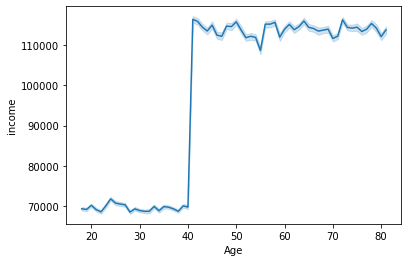

In [43]:
line_age_income = sns.lineplot(data = line1, x = 'Age',y = 'income')

In [44]:
line_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_income.png'))

#### Bar chart of department id and the spendings

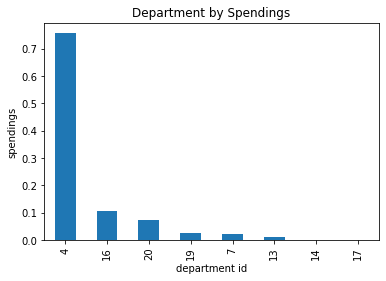

In [53]:
bar_dept_spendings= new_customer1['department_id'].value_counts('max_order').plot.bar()
plt.xlabel('department id')
plt.ylabel('spendings')
plt.title('Department by Spendings')
plt.show()

In [54]:
bar_dept_spendings.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_spendings.png'))

#### Histogram of Family status and income

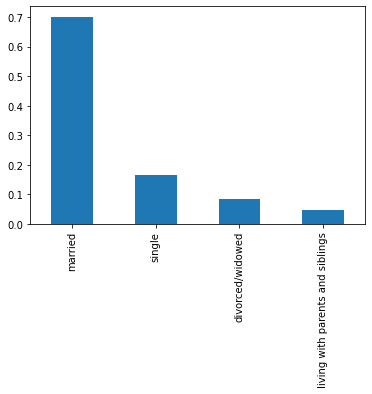

In [66]:
bar_fam_income= new_customer1['fam_status'].value_counts('income').sum('income').plot.bar()

In [67]:
hist_= customers_new['prices'].plot.hist(bins = 25)

NameError: name 'customers_new' is not defined

In [68]:
bar_fam_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_income.png'))

#### Scatterplot of customers age and spendings

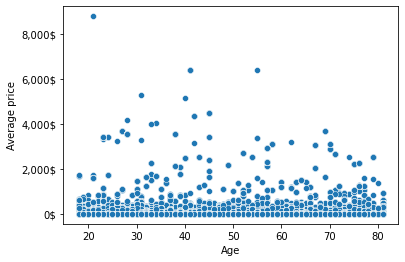

In [94]:
Scatt_age_spendings= sns.scatterplot(x = 'Age', y = 'Average_price',data = new_customer1)
Scatt_age_spendings.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) + '$'))
plt.ylabel("Average price")
plt.show()

In [96]:
Scatt_age_spendings.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatt_age_spendings.png'))

#### Bar chart of  Region with their average income

#### Bar chart income level

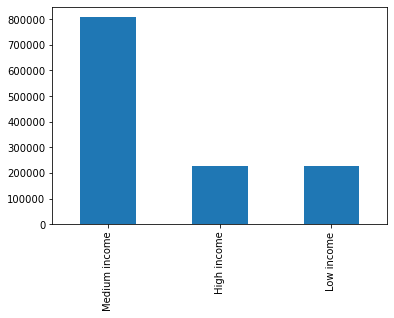

In [71]:
bar_region_incomelevel= new_customer1['income level'].value_counts().plot.bar()

In [72]:
bar_region_incomelevel.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_incomelevel.png'))

#### Pie chart customers income level

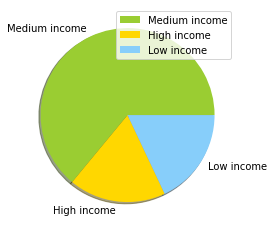

In [73]:
#creating pie chart with income level data
labels = ['Medium income', 'High income', 'Low income ']
sizes = [808354, 227454, 227165]
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels = labels, shadow = True, colors = colors)
plt.legend()
plt.show()

In [74]:
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_chart_incomelevel.png'))

<Figure size 432x288 with 0 Axes>

#### 7. Aggregating the  customers profile level for frequency and expenditure

In [75]:
#Grouping user by expenditure
new_customer1.groupby('user_id').agg({'prices': ['mean', 'min', 'max']})

prices            
              mean   min   max
user_id                       
1         6.367797   1.0  14.0
2         6.610811   1.3  14.8
3         5.050000   1.3   6.3
7         5.271429   1.8  14.8
11       10.300000  10.3  10.3
...            ...   ...   ...
206202    1.600000   1.3   2.5
206206    8.300000   1.8  14.8
206207    8.835000   4.4  14.8
206208    7.856410   4.4  10.3
206209   10.300000  10.3  10.3

[124378 rows x 3 columns]

In [76]:
# grouping users by frequency

new_customer1.groupby('user_id').agg({'order_frequency_flag': ['mean', 'min', 'max']})

order_frequency_flag            
                        mean   min   max
user_id                                 
1                       20.0  20.0  20.0
2                       13.0  13.0  13.0
3                       11.0  11.0  11.0
7                        9.0   9.0   9.0
11                      14.0  14.0  14.0
...                      ...   ...   ...
206202                  11.0  11.0  11.0
206206                   3.0   3.0   3.0
206207                  11.0  11.0  11.0
206208                   7.0   7.0   7.0
206209                  18.0  18.0  18.0

[124378 rows x 3 columns]

#### 8. Compare your customer profiles with regions and departments

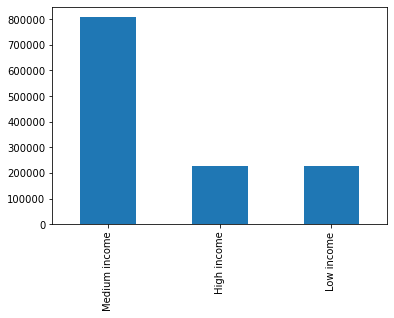

In [77]:
# Income level of each region
bar_region_incomelevel2= new_customer1['income level'].value_counts().plot.bar()

In [78]:
bar_region_incomelevel2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_incomeleve2.png'))

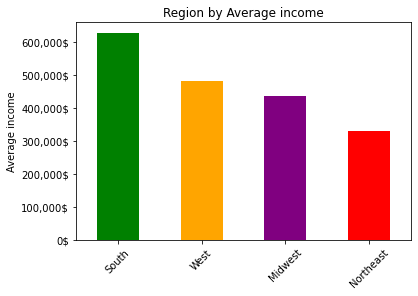

In [152]:
#Average income of each region
bar_region_income2 = new_customer1['Region'].value_counts().plot.bar(color = ['green', 'orange', 'purple', 'red'])
plt.ylabel('Average income')
bar_region_income2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) + '$'))
plt.xticks(rotation= 45)
plt.title('Region by Average income')
plt.show()


In [151]:
bar_region_income2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income2.png'))

In [81]:
#Loyalty flag in each region
bar_region_loyalty_flag = new_customer1.groupby(['Region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

<AxesSubplot:xlabel='Region'>

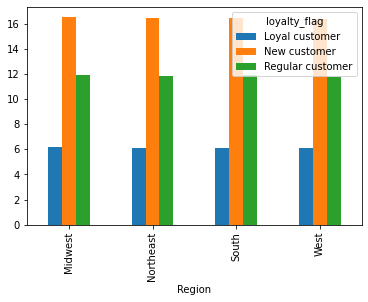

In [82]:
bar_region_loyalty_flag.plot(kind='bar', stacked=False)